<a id="Top"></a>

# Sales Lead Prediction Using Machine Learning Classification 

## Contents
1. [Introduction](#Intro)
2. [Source](#Source) 

3. Part 1: Analysis and Preparation of the Data
    1. [Exploratory Data Analysis](#EDA)
        1. [Preliminary Examination](#PE)
        2. [Data Cleaning and Preparation, Feature Selection](#DC)
        3. [Visualization](#viz)
        4. [Checking Outliers](#CO)
    2. [Removing Outliers](#O)
    3. [Feature Engineering](#FE)
</br></br>
4. Part 2: [Machine Learning](#ML)
    1. [Preparation of the Model](#Prep)
    2. [Training](#Train)
    3. [Testing](#Test)
    4. [Hyper parameter tuning](#H)

</br>

5. [Relevant Research](#Res)

<a id = "Intro"></a>

### Introduction 
When a business seeks to increase revenue, a myriad of strategies can be employed. One technique is to sell more to current clientelle. The advantage of this approach is that the leads are already captured and are in a position of trust in the vendor, and it is therefore not a random cold-calling situation. The challenge, however --and this is not unique to this scenario, but applies in any marketing campaign-- is balancing the time and money needed for the marketing effort vs the actual resultant revenue. Ah, if only there was a way to optimize it! To know which customers would most likely be interested in the product, so that we could market to them directly instead of blanketing the entire client base in the usual hit-and-miss fashion! To reduce the hassle, the headache, the aggravation, the woes! Is there a way to know? Well, in 2021, there is! And it does not involve calling your shaman uncle from New Orleans to do voodoo sourcery. We can just use machine learning.

#### Overarching Goal
Can we use Machine Learning to predict which customers at this bank would be interested in buying a credit card product based on a set of characteristics? In this project, I analyze the data, prepare it, and build the ML model which will make this prediction. 

#### Defined objectives
1. Find out which customer is most likely to be interested in buying a product using a machine learning prediction algorithm (classification).
2. Learn what factor is the most influential in determining the likelyhood that a client will be a lead based on the given attributes. 

#### Motivation
Assist a business in increasing its profit by enabling the marketing department to more accurately target clients that are most likely to buy, in turn reducing cost and turn-around time. 

<a id="Source"></a>

### Source:
The dataset is from https://www.kaggle.com/nextbigwhat/analytics-vidhya-job-a-thon-may-2021



<br><br>

[Back to Top](#Top)

## Part 1: Analysis and Preparation of the Data

<a id="EDA"></a>

## Exploratory Data Analysis

<a id = "PE"></a>

### Preliminary Examination of Data

In [1]:
#Import Libraries

import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,5]
warnings.filterwarnings("ignore")

# Multiple Line Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load dataset and apply variable name
dataset = pd.read_csv('../Datasets/AnalyticsVidhya-JOB_A_THON-May2021/train_s3TEQDk.csv')

#The original data contains two files, which appear to be a dataset divided in two. Since one is much larger than the other, we'll stick to that one.

In [3]:
#Preliminary examination of dataset / EDA

print('Preview')
dataset
print('-----------------------------------------------------')
print(f'The shape of the dataset is {dataset.shape}.')
print('-----------------------------------------------------')
print('Describe')
dataset.describe().T
print('-----------------------------------------------------')
print('Info')
dataset.info()

Preview


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


-----------------------------------------------------
The shape of the dataset is (245725, 11).
-----------------------------------------------------
Describe


,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


-----------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [4]:
print('Count of lead values (yes/no)')
dataset.Is_Lead.value_counts()
print('-----------------------------------------------------')
print('Count of active values (yes/no)')
dataset.Is_Active.value_counts()
print('-----------------------------------------------------')
dataset[['Is_Active', 'Is_Lead']].apply(pd.Series.value_counts)

Count of lead values (yes/no)


0    187437
1     58288
Name: Is_Lead, dtype: int64

-----------------------------------------------------
Count of active values (yes/no)


No     150290
Yes     95435
Name: Is_Active, dtype: int64

-----------------------------------------------------


,Is_Active,Is_Lead
No,150290.0,NaN
Yes,95435.0,NaN
0,NaN,187437.0
1,NaN,58288.0


In [5]:
dataset.groupby("Is_Active").mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Is_Active,,,,
No,41.271209,41.561674,1.076315e+06,0.208151
Yes,47.927291,55.459014,1.210431e+06,0.282967


In [6]:
dataset.groupby("Is_Lead").mean()

,Age,Vintage,Avg_Account_Balance
Is_Lead,,,
0,41.947662,41.913923,1.103018e+06
1,49.993944,63.183074,1.210034e+06


The dataset contains 245,725 rows (clients) and 11 columns. 
The target (dependent) variable is 'Is_Lead'. This means whether the customer has indicated interest. 
The other 10 columns are the independent variables.

<a id="DC"></a>

### Data Cleaning, Feature Selection

In [7]:
df = dataset

In [8]:
#Check that there are no duplicate rows

print("Total rows:") 
df.shape
print("Total unique rows:")
df.ID.unique().shape

#Store original number of rows for comparison of kept/removed rows later (
original_row_num = df.shape[0]

#Create new variable to preserve original untouched for future use
dfmod = df.copy()

#Some columns are uneeded, so we'll go ahead and remove those.
dfmod.drop(['ID'], axis=1, inplace=True)

Total rows:


(245725, 11)

Total unique rows:


(245725,)

There are no duplicate records.

In [9]:
#Turn records into numerical values where possible
dfmod["Gender"].replace({"Male": "0", "Female": "1"}, inplace=True)
dfmod["Credit_Product"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod["Is_Active"].replace({"No": "0", "Yes": "1"}, inplace=True)
dfmod.head(5)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0


In [10]:
# Check the column data types
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [11]:
# Check how many unique values in all columns
for col in dfmod.columns:
    count = dfmod[col].unique().shape[0]
    print(col + ': ' + str(count))

Gender: 2
Age: 63
Region_Code: 35
Occupation: 4
Channel_Code: 4
Vintage: 66
Credit_Product: 3
Avg_Account_Balance: 135292
Is_Active: 2
Is_Lead: 2


In [12]:
# Check presence of null values in any columns
(dfmod.astype(np.object).isnull()).any()

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

In [13]:
# Calculate total number of null values in all of the columns
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 29325
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [14]:
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0    144357
1     72043
Name: Credit_Product, dtype: int64

In [15]:
#Since null values in Credit_Product column constitute a significant portion of the data, impute them to "999"

dfmod['Credit_Product'].fillna("999",inplace=True)
dfmod

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0
1,1,30,RG277,Salaried,X1,32,0,581988,0,0
2,1,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,0,34,RG270,Salaried,X1,19,0,470454,0,0
4,1,30,RG282,Salaried,X1,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245720,0,51,RG284,Self_Employed,X3,109,999,1925586,0,0
245721,0,27,RG268,Salaried,X1,15,0,862952,1,0
245722,1,26,RG281,Salaried,X1,13,0,670659,0,0
245723,1,28,RG273,Salaried,X1,31,0,407504,0,0


In [16]:
# Recheck presence of nulls
(dfmod.astype(np.object).isnull()).any()
print('-----------------------------------------------------')
for col in dfmod.columns:
    count = dfmod[col].isnull().sum()
    print(col + ' ' + str(count))

Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product         False
Avg_Account_Balance    False
Is_Active              False
Is_Lead                False
dtype: bool

-----------------------------------------------------
Gender 0
Age 0
Region_Code 0
Occupation 0
Channel_Code 0
Vintage 0
Credit_Product 0
Avg_Account_Balance 0
Is_Active 0
Is_Lead 0


In [17]:
#Check the values in that column once more
print('Count of credit product values')
dfmod.Credit_Product.value_counts()

Count of credit product values


0      144357
1       72043
999     29325
Name: Credit_Product, dtype: int64

In [18]:
# Check the column data types again
dfmod.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [19]:
#Convert numeric columns to the appropriate type where possible
dfmod = dfmod.apply(pd.to_numeric, errors='ignore')
dfmod.dtypes

Gender                  int64
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product          int64
Avg_Account_Balance     int64
Is_Active               int64
Is_Lead                 int64
dtype: object

In [20]:
# # Check the balance of the dataset
# # This dataset is unbalanced and will have to be dealt with in different ways
dfmod.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [21]:
# # Segment the dataset for visualization
# dfmod_Lead_Yes = dfmod[dfmod['Is_Lead'] == "1"]
# dfmod_Lead_No = dfmod[dfmod['Is_Lead'] == "0"]

In [22]:
dfmod.sample(10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
44422,0,77,RG283,Other,X2,55,0,1006696,1,0
173953,0,75,RG283,Other,X3,117,1,701142,0,0
12324,0,52,RG280,Self_Employed,X3,86,0,474005,1,0
87969,1,32,RG252,Salaried,X1,31,0,872520,0,0
109704,1,27,RG268,Salaried,X1,15,1,505840,1,0
147759,0,40,RG284,Other,X2,67,0,2544661,1,1
211887,1,26,RG264,Other,X1,13,0,611786,1,0
64672,0,49,RG268,Self_Employed,X2,75,1,556027,1,0
244781,0,30,RG252,Salaried,X1,33,1,454798,0,1
68074,0,29,RG267,Salaried,X1,21,0,502494,0,0


[Back to Top](#Top)

<a id="viz"></a>

### Visualization

<AxesSubplot:xlabel='Is_Active', ylabel='Avg_Account_Balance'>

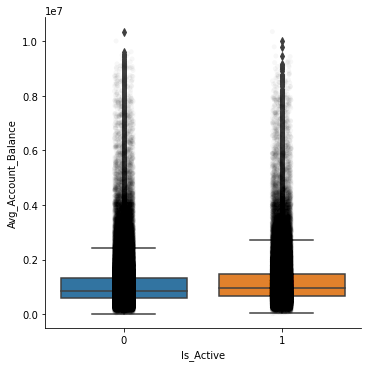

In [23]:
# Look at the differences between leads and non-leads in terms of average account balance

sns.catplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = dfmod,  kind="box")
sns.stripplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod, jitter=0.06,color='k',alpha=0.03)

<AxesSubplot:xlabel='Is_Active', ylabel='Avg_Account_Balance'>

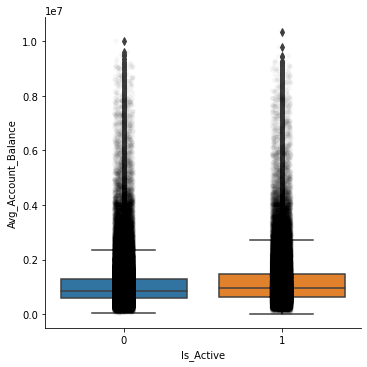

In [24]:
# Look at the differences between active and inactive clients in terms of average account balance 

sns.catplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod,  kind="box")
sns.stripplot(x = 'Is_Active', y = 'Avg_Account_Balance', data = dfmod, jitter=0.06,color='k',alpha=0.03)

In [25]:
dfmod.head(0)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [26]:
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)

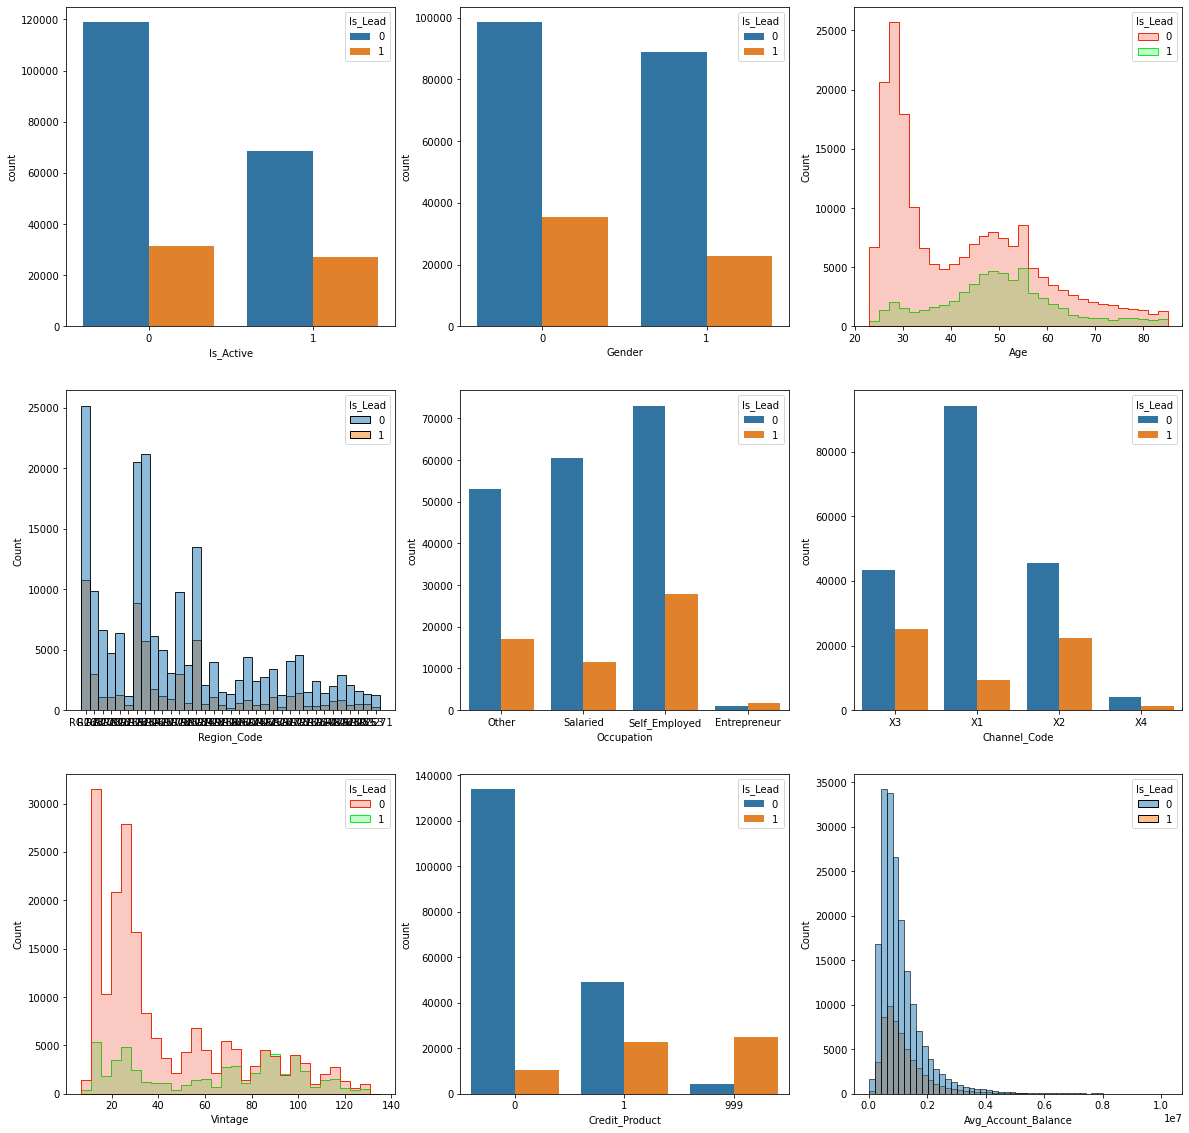

In [27]:
# Check contributing factors to a client being a lead across customer attributes

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,20))
sns.countplot(x = "Is_Active", hue = 'Is_Lead', data = dfmod, ax=axes[0][0])
sns.countplot(x = "Gender", hue = 'Is_Lead', data = dfmod, ax=axes[0][1])
sns.histplot(x = "Age", hue = 'Is_Lead', bins=30, data = dfmod, element = "step", ax=axes[0][2], palette=['#ed2e0c',"#0ced26"])
sns.histplot(x = 'Region_Code', hue = "Is_Lead", bins = 50, data = dfmod, element = "bars", ax=axes[1][0],)
sns.countplot(x = "Occupation", hue = 'Is_Lead', data = dfmod, ax=axes[1][1])
sns.countplot(x = "Channel_Code", hue = 'Is_Lead', data = dfmod, ax=axes[1][2])
sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Lead', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])
sns.countplot(x = "Credit_Product", hue = 'Is_Lead', data = dfmod, ax=axes[2][1])
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", bins = bins, data = dfmod, ax=axes[2][2])
#ax = sns.countplot(x = "Credit_Product", hue = 'Gender', data = dfmod, ax=axes[1][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig);

#sns.countplot(x = "Region_Code", hue = 'Is_Lead', data = dfmod, ax=axes[1][0]) #remove.

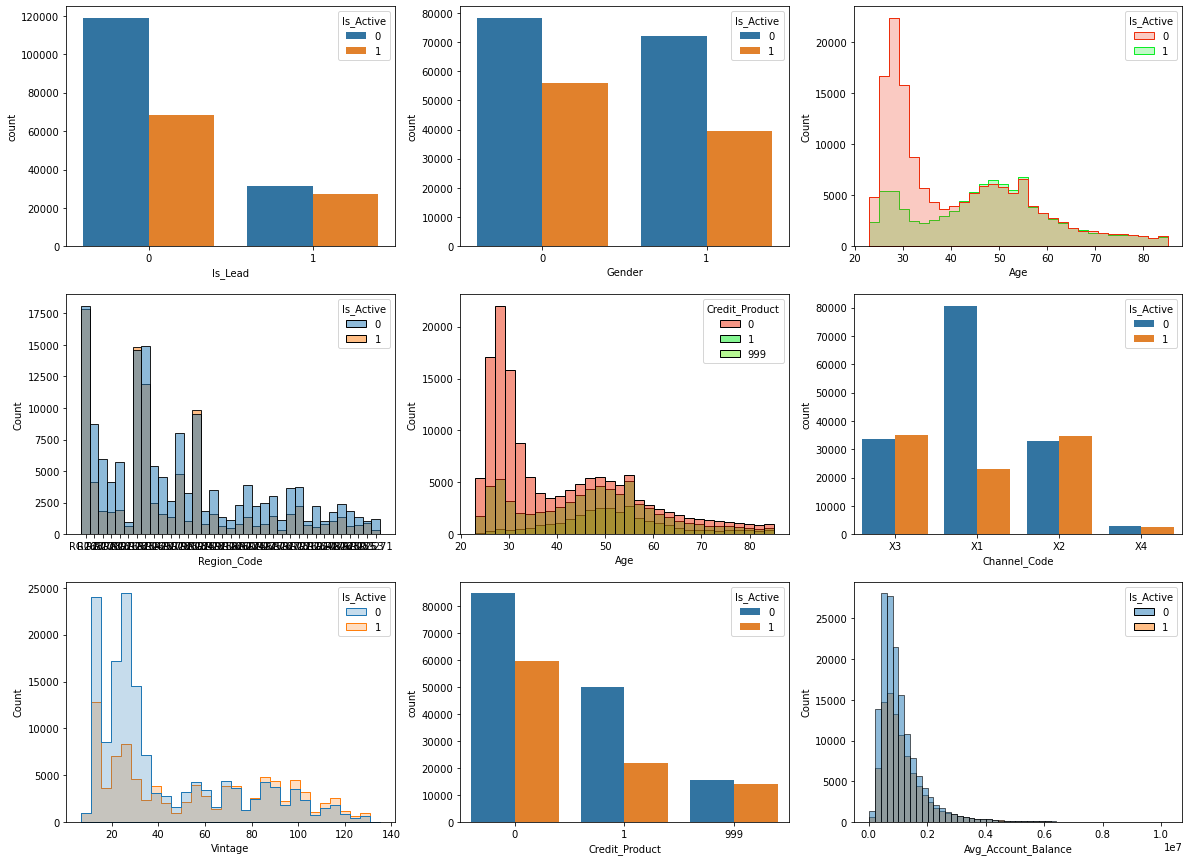

In [28]:
# Check contributing factors to a customer being active across customer attributes

bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,15))
sns.countplot(x = "Is_Lead", hue = 'Is_Active', data = dfmod, ax=axes[0][0])
sns.countplot(x = "Gender", hue = 'Is_Active', data = dfmod, ax=axes[0][1])
sns.histplot(x = "Age", hue = 'Is_Active', bins=30, data = dfmod, element = "step", ax=axes[0][2], palette=['#ed2e0c',"#0ced26"])
sns.histplot(x = 'Region_Code', hue = "Is_Active", bins = 50, data = dfmod, element = "bars", ax=axes[1][0],)
sns.histplot(x = "Age", bins = 30, hue = 'Credit_Product', data = dfmod, ax=axes[1][1], element = "bars", palette=['#ed2e0c',"#0ced26", "#6eef26"])
sns.countplot(x = "Channel_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][2])
sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Active', data = dfmod, ax=axes[2][0], element = 'step')
sns.countplot(x = "Credit_Product", hue = 'Is_Active', data = dfmod, ax=axes[2][1])
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Active", bins = bins, data = dfmod, ax=axes[2][2])
#ax = sns.countplot(x = "Credit_Product", hue = 'Gender', data = dfmod, ax=axes[1][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig);

# sns.countplot(x = "Region_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][0])

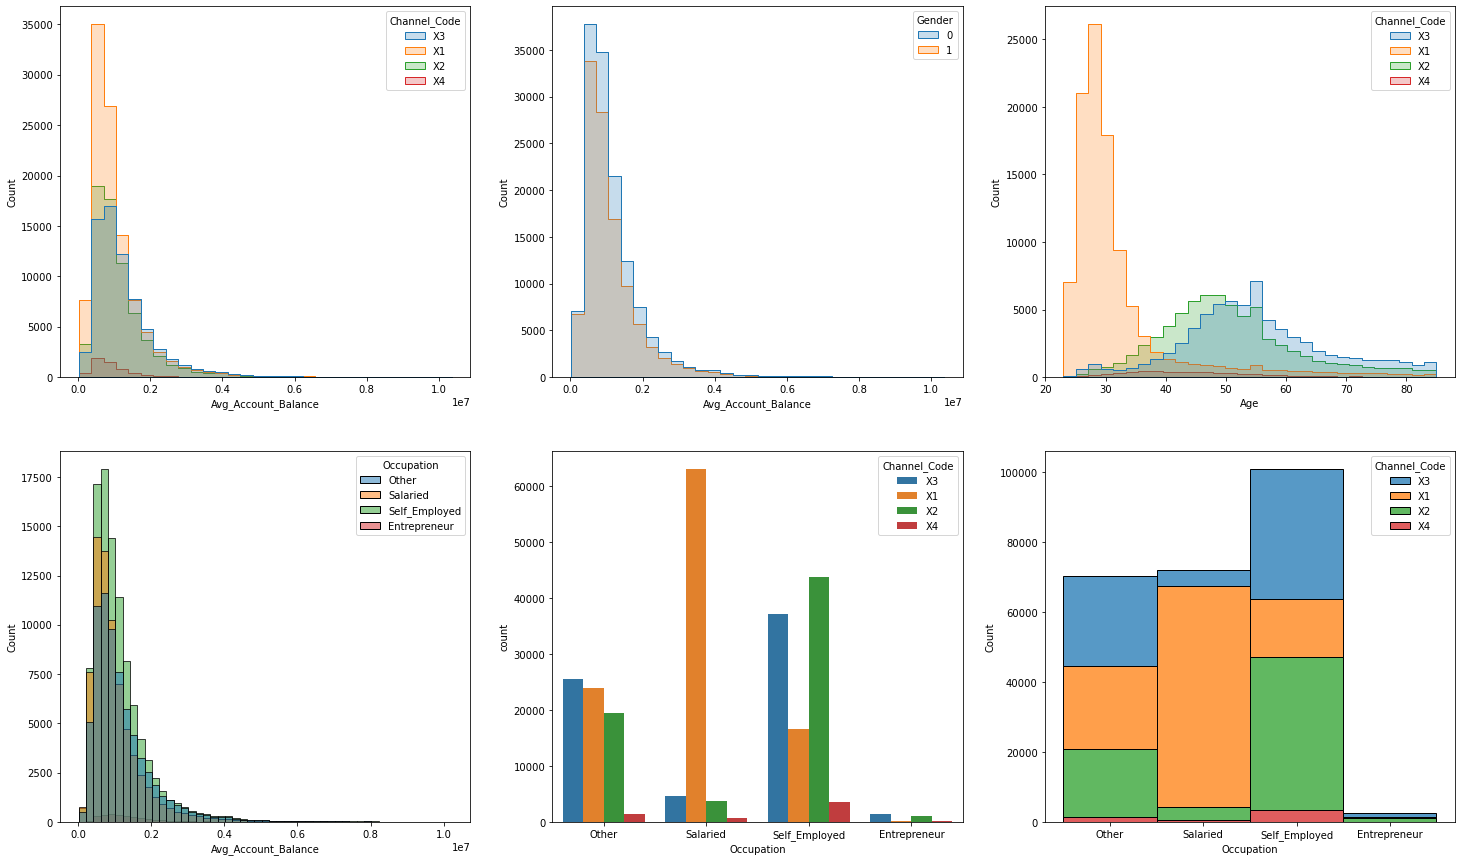

In [29]:
# Explore other possible correlations or relationships in the data

bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
#sns.histplot(x = "Vintage", bins = 30, hue = 'Is_Active', data = dfmod, ax=axes[2][0], element = 'step', palette=['#ed2e0c',"#0ced26"])

fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (25,15))
sns.histplot(x = "Avg_Account_Balance", bins = 30, hue = 'Channel_Code', data = dfmod, ax=axes[0][0], element = 'step')
sns.histplot(x = "Avg_Account_Balance", bins = 30, hue = 'Gender', data = dfmod, ax=axes[0][1], element = 'step')
sns.histplot(x = "Age", hue = 'Channel_Code', bins=30, data = dfmod, element = "step", ax=axes[0][2])
sns.histplot(x = 'Avg_Account_Balance', hue = "Occupation", bins = bins, data = dfmod, element = "bars", ax=axes[1][0],)
sns.countplot(x = "Occupation", hue = 'Channel_Code', data = dfmod, ax=axes[1][1])
sns.histplot(x = "Occupation", hue = 'Channel_Code', data = dfmod, ax=axes[1][2], multiple="stack")

plt.show(fig);

# sns.countplot(x = "Region_Code", hue = 'Is_Active', data = dfmod, ax=axes[1][0])

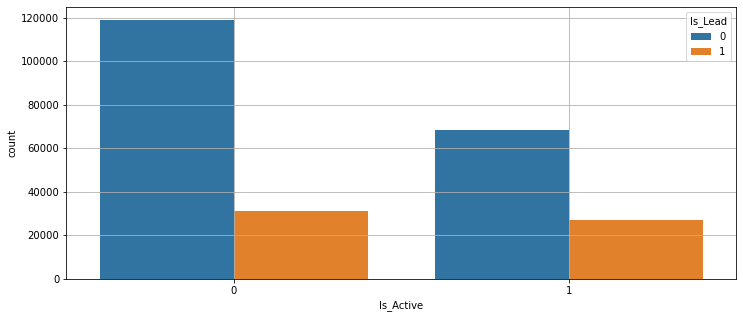

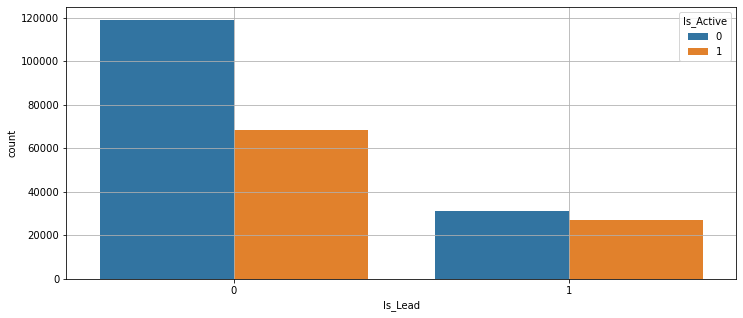

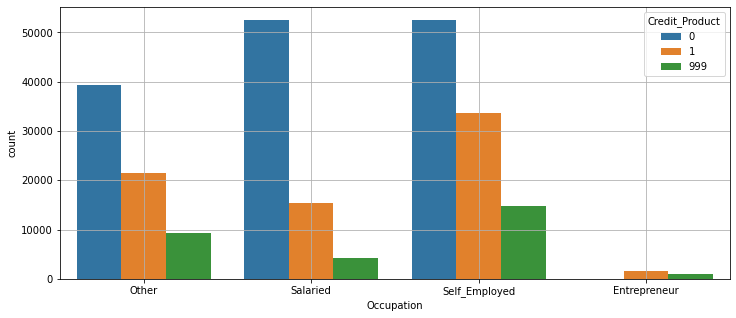

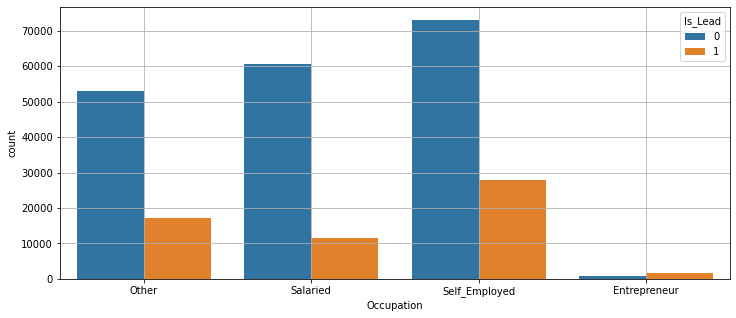

In [30]:
#Zooming in on whether inactive clients could be leads
sns.countplot(x = "Is_Active", hue = 'Is_Lead', data = dfmod)
plt.grid()
plt.show();
#Zooming in on how active are the leads
sns.countplot(x = "Is_Lead", hue = 'Is_Active', data = dfmod)
plt.grid()
plt.show();
#Which occupation has which product already?
sns.countplot(x = "Occupation", hue = 'Credit_Product', data = dfmod)
plt.grid()
plt.show();
#Leads per occupation
sns.countplot(x = "Occupation", hue = 'Is_Lead', data = dfmod)
plt.grid()
plt.show();

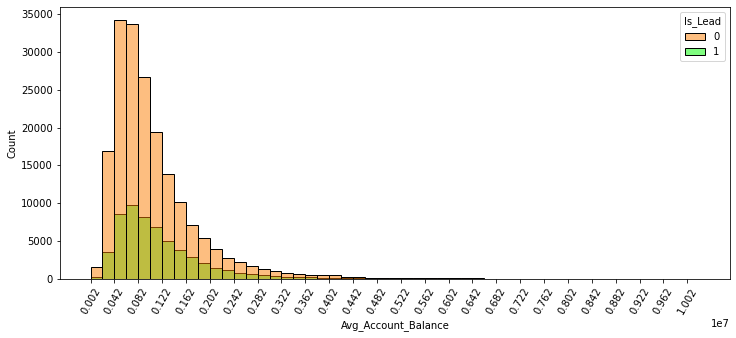

In [31]:
#Check Leads based on average account balance. 
#This is done in a dedicated cell since the Average Account attribute is the most data-heavy.
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
bins1 = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),400000)
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", palette=['#fc7f03',"#03fc03"], bins = bins, data = dfmod)
plt.xticks(bins1, rotation=60)
plt.show();

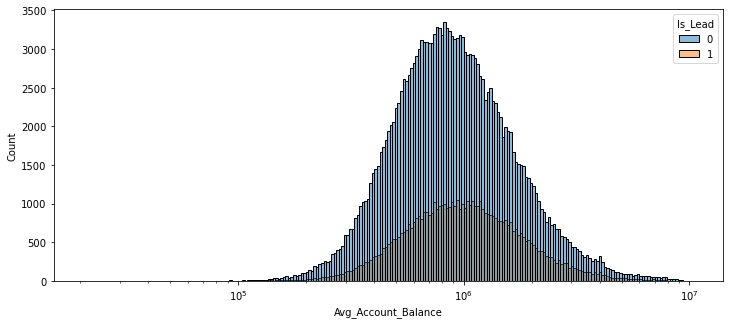

In [32]:
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),200000)
sns.histplot(x = "Avg_Account_Balance", hue = "Is_Lead", data = dfmod, log_scale=True)
plt.show();

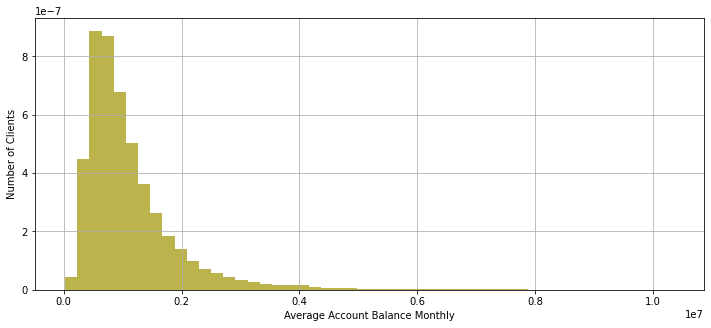

In [33]:
df['Avg_Account_Balance'].hist(bins=50, density=True,color='#bbb34b')
plt.ylabel('Number of Clients')
plt.xlabel('Average Account Balance Monthly')
plt.show();

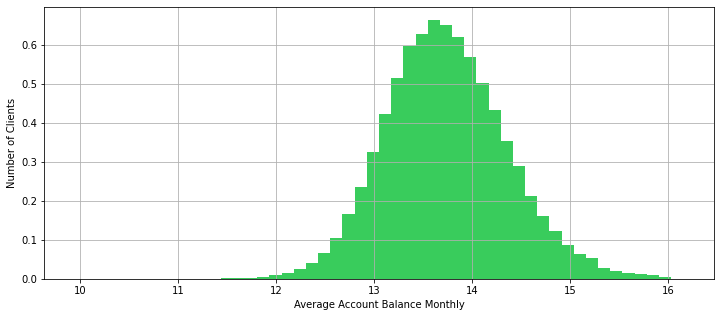

In [34]:
np.log(df['Avg_Account_Balance']).hist(bins=50, density=True,color='#39cc5c')
plt.ylabel('Number of Clients')
plt.xlabel('Average Account Balance Monthly')
plt.show();

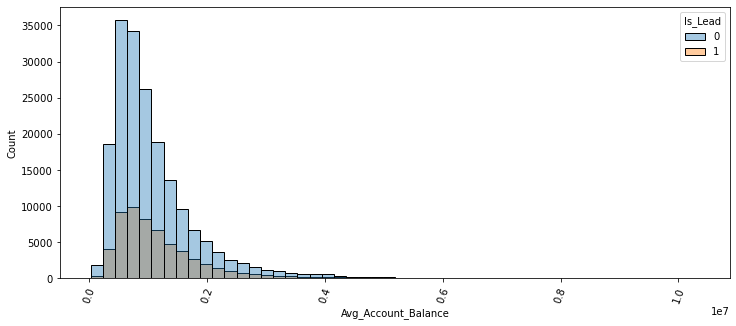

In [35]:
#Check Leads based on average account balance. 

sns.histplot(x = 'Avg_Account_Balance', hue = "Is_Lead", bins = 50, data = dfmod, palette = "tab10", element = "bars", alpha = 0.4)
plt.xticks(rotation=70) 
plt.show();
#sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, element = "poly", data = dfmod, ax=axes[1][0])

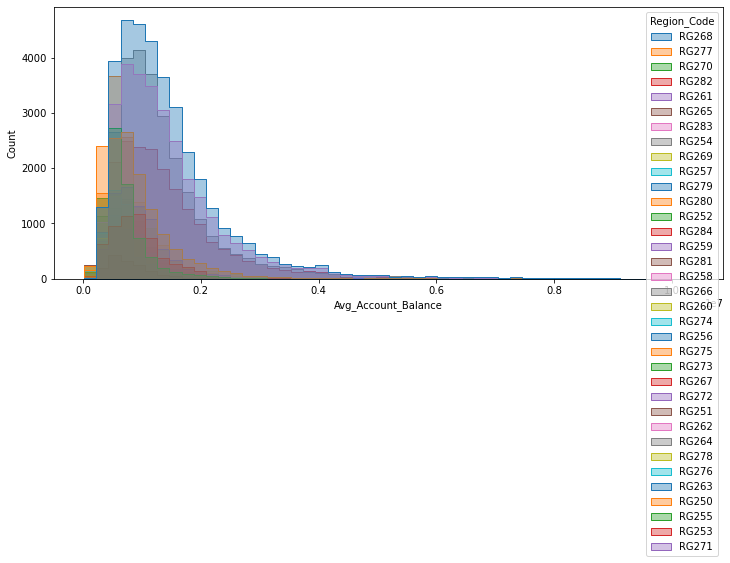

In [36]:
#Checking clients and leads based on region

#Region based on average account balance. 

sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, data = dfmod, palette = "tab10", element = "step", alpha = 0.4)
plt.show();
#sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, element = "poly", data = dfmod, ax=axes[1][0])

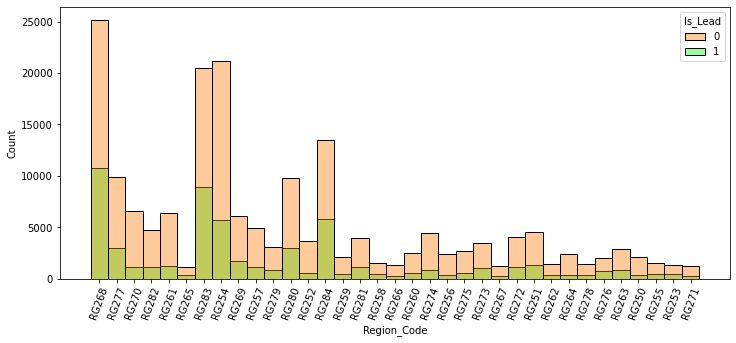

In [37]:
#Check Leads and Clients based on region. 

sns.histplot(x = 'Region_Code', hue = "Is_Lead", bins = 50, data = dfmod, element = "bars", alpha = 0.4, palette=['#fc7f03',"#03fc03"])
plt.xticks(rotation=70) 
plt.show();
#sns.histplot(x = "Avg_Account_Balance", hue = 'Region_Code', bins = 50, element = "poly", data = dfmod, ax=axes[1][0])

In [38]:
#Some segmentation and filtering for visualization

Active = dfmod.loc[dfmod['Is_Active'] == 1].count()[0]
Inactive= dfmod.loc[dfmod['Is_Active'] == 0].count()[0]

Lead = dfmod.loc[dfmod['Is_Lead'] == 1].count()[0]
NotLead= dfmod.loc[dfmod['Is_Lead'] == 0].count()[0]

Leads = dfmod.loc[dfmod['Is_Lead'] == 1]

#Occupations

E = dfmod.loc[dfmod['Occupation'] == "Entrepreneur"].count()[0]
SE = dfmod.loc[dfmod['Occupation'] == "Self_Employed"].count()[0]
S = dfmod.loc[dfmod['Occupation'] == "Salaried"].count()[0]
O = dfmod.loc[dfmod['Occupation'] == "Other"].count()[0]

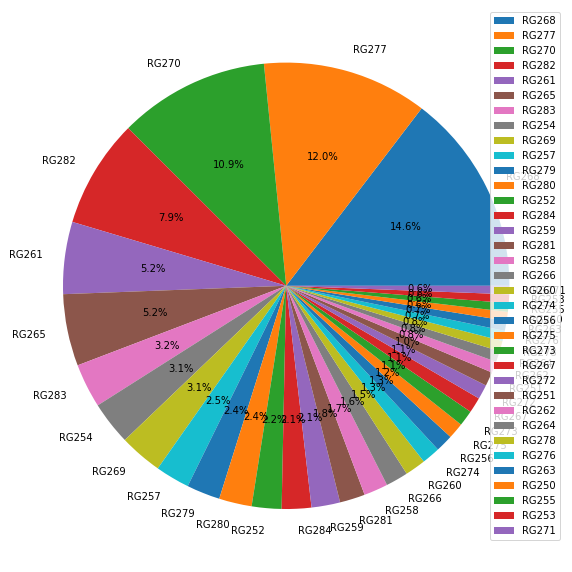

In [39]:
#Clients and regions


plt.figure(figsize=(10, 15))
plt.pie(dfmod.Region_Code.value_counts(), autopct='%1.1f%%', data=dfmod,labels= dfmod.Region_Code.unique())
plt.legend(loc= "upper right")
#plt.xticks(bins,rotation=70)
plt.show();

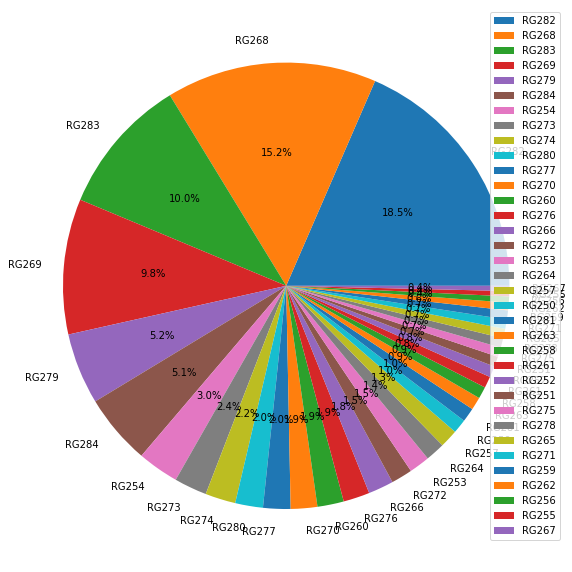

In [40]:
#Leads and regions

plt.figure(figsize=(10, 15))
plt.pie(Leads.Region_Code.value_counts(), autopct='%1.1f%%', data=Leads,labels= Leads.Region_Code.unique())
plt.legend(loc= "upper right")
#plt.xticks(bins,rotation=70)
plt.show();

In [41]:
#Check how many unique regionc codes there are in the data
n = len(pd.unique(dfmod['Region_Code']))
n

35

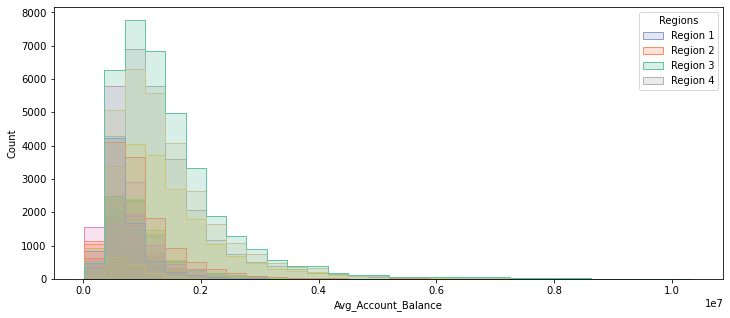

In [42]:
g= sns.histplot(x="Avg_Account_Balance", hue="Region_Code", bins = 30, data=dfmod, legend=True, element = "step", palette = 'Set2')
plt.legend(title='Regions', loc='upper right', labels=['Region 1', 'Region 2', 'Region 3', 'Region 4'])
plt.show();

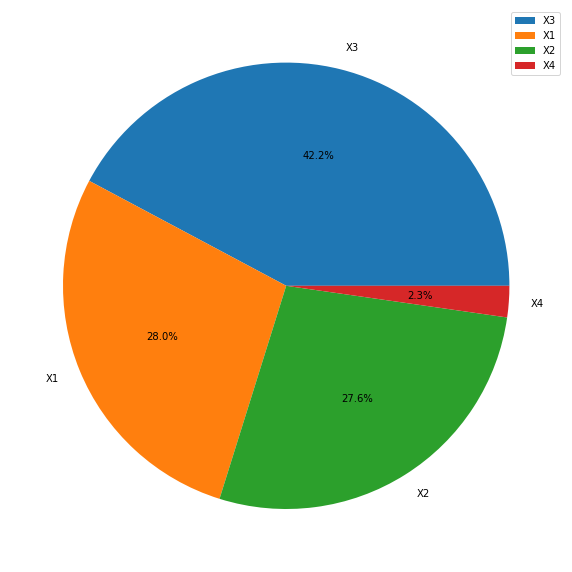

In [43]:
#Clients and aquisition channels

plt.figure(figsize=(10, 15))
plt.pie(dfmod.Channel_Code.value_counts(), autopct='%1.1f%%', data=dfmod,labels= dfmod.Channel_Code.unique())
plt.legend(loc= "upper right")
#plt.xticks(bins,rotation=70)
plt.show();

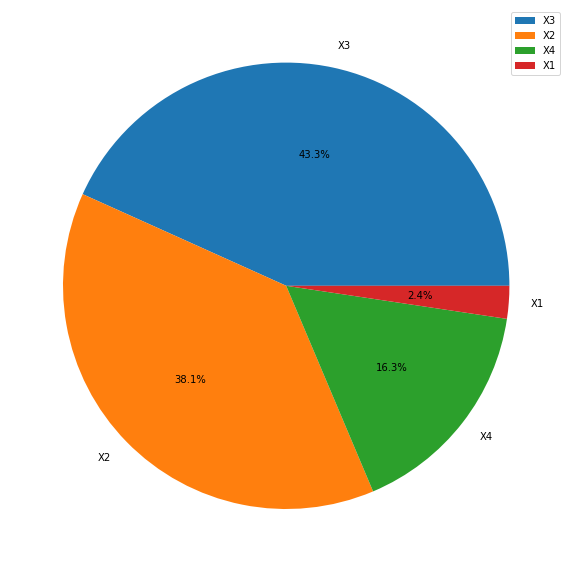

In [44]:
#Leads and aquisition channels

plt.figure(figsize=(10, 15))
plt.pie(Leads.Channel_Code.value_counts(), autopct='%1.1f%%', data=Leads,labels= Leads.Channel_Code.unique())
plt.legend(loc= "upper right")
#plt.xticks(bins,rotation=70)
plt.show();

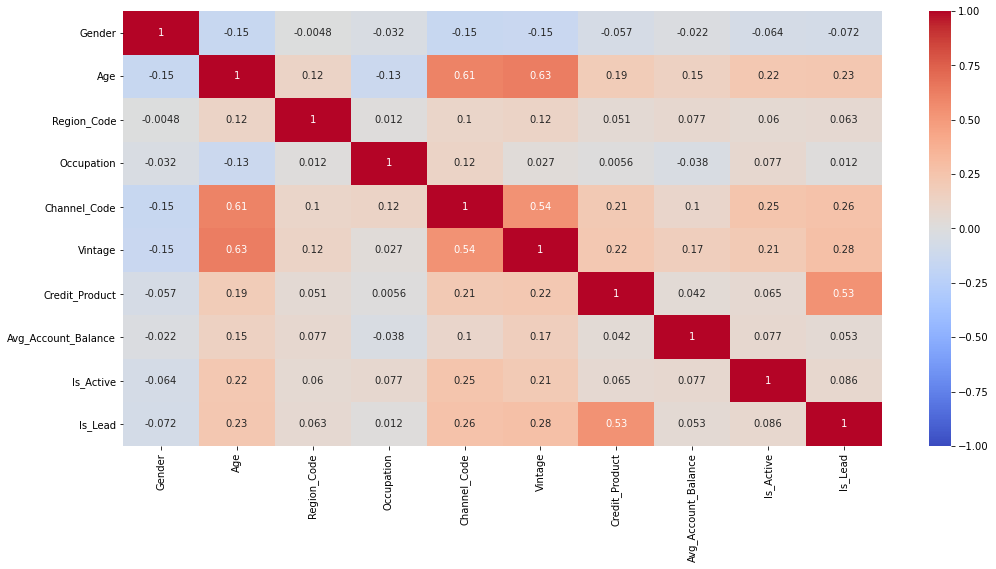

In [45]:
#Correlation plot

from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder and apply it to the dataframe
df_corr = dfmod.copy()
encoder = OrdinalEncoder()
for col in df_corr.columns:
    if dfmod[col].dtype == 'object':
        x = df_corr[col].values.reshape(-1, 1)
        df_corr[col] = encoder.fit_transform(x)
        
# Create a correlation heatmap to check correlation between all features
plt.figure(figsize=(17, 8))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

Based on the heatmap, it seems that there is not a large correlation between any single feature and the target variable. 
The highest correlation is to credit product, but that is not granular enough for the accuracy we are looking for.
We shall see how well ML can extract a pattern by considering all factors together.

It appears that the Age and Vintage columns are highly correlated, so one thing to try is to remove one of them and check how the model behaves with and without it.

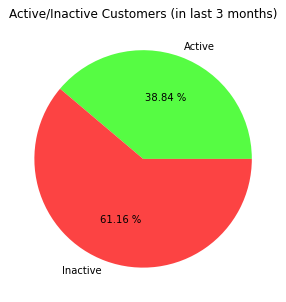

In [46]:
plt.figure(figsize=(8,5))

labels = ['Active', 'Inactive']
colors = ['#56FC43', '#FC4343']

plt.pie([Active, Inactive], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Active/Inactive Customers (in last 3 months)')

plt.show();

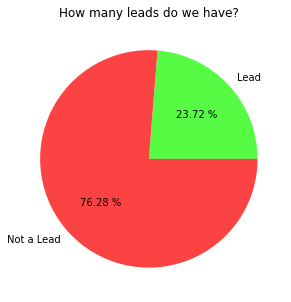

In [47]:
plt.figure(figsize=(8,5))

labels = ['Lead', 'Not a Lead']
colors = ['#56FC43', '#FC4343']

plt.pie([Lead, NotLead], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('How many leads do we have?')

plt.show();

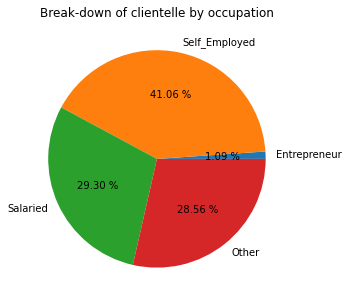

In [48]:
#Clients by occupation

plt.figure(figsize=(8,5))

labels = ['Entrepreneur', 'Self_Employed','Salaried','Other']

plt.pie([E, SE, S, O], labels = labels, autopct='%.2f %%')

plt.title('Break-down of clientelle by occupation')

plt.show();

In [49]:
#Due to most of the columns being categorical in this dataset, there aren't many useful scatterplots for visualization
dfmod.head(1)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,RG268,Other,X3,43,0,1045696,0,0


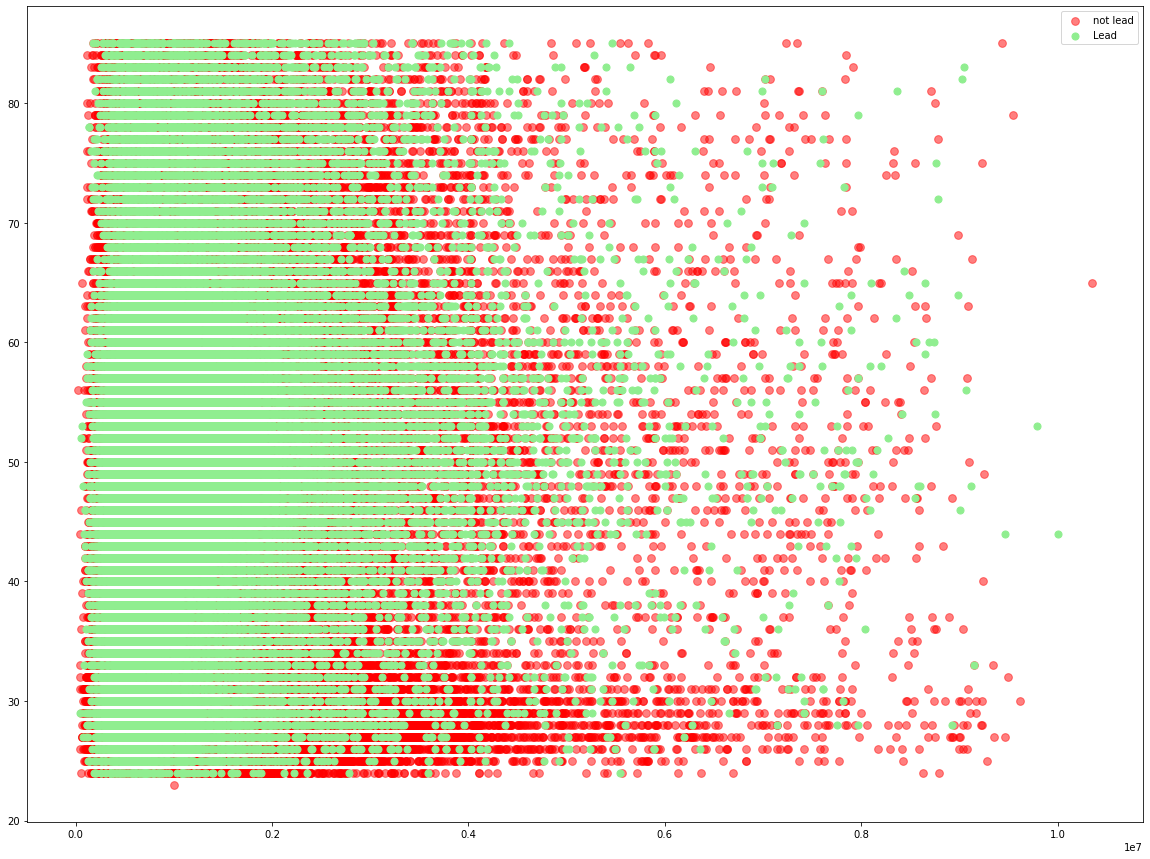

In [50]:
#Visualizing leads based on account balance and age in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Age, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Age, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

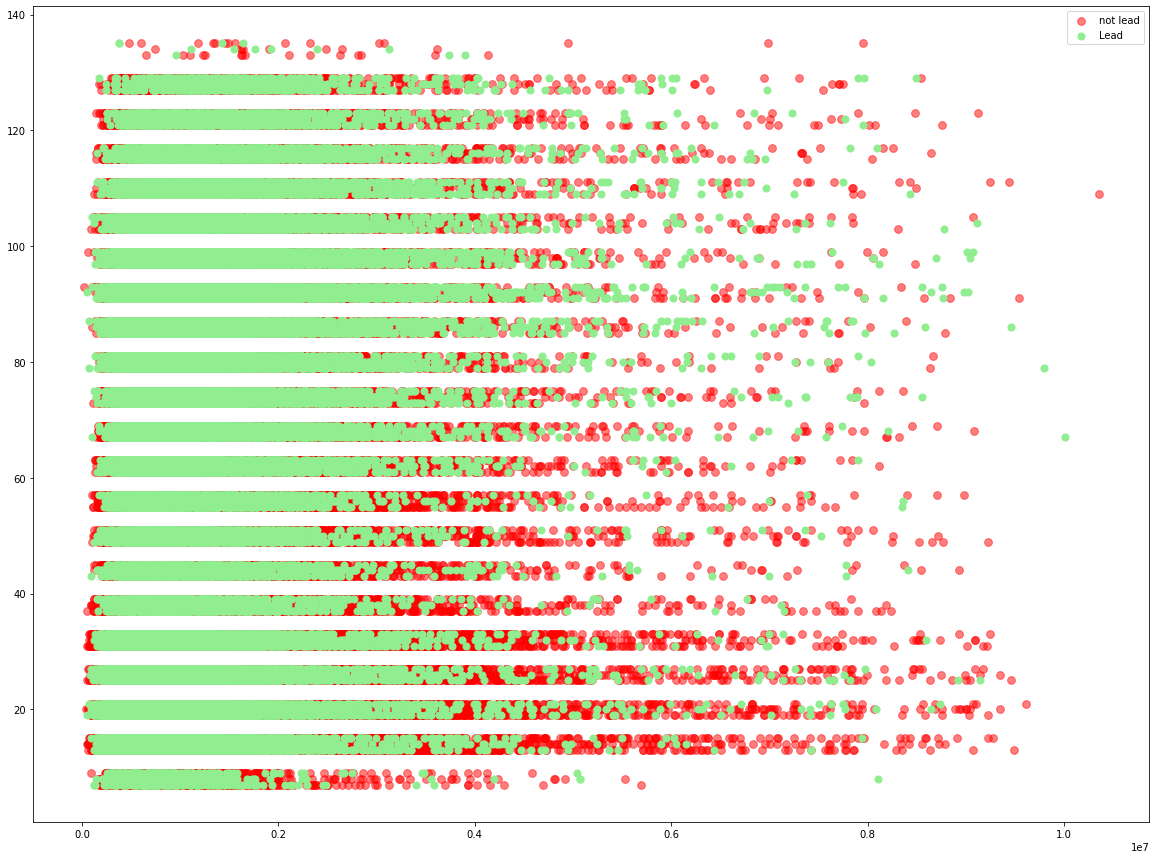

In [51]:
#Visualizing leads based on account balance and Vintage in a scatterplot

plt.figure(figsize=(20,15))
dfIsLead = df[df.Is_Lead == 1]
dfIsNotLead = df[df.Is_Lead == 0]
plt.scatter(dfIsNotLead.Avg_Account_Balance,dfIsNotLead.Vintage, s = 60, label = "not lead",color='red', alpha = .5)
plt.scatter(dfIsLead.Avg_Account_Balance,dfIsLead.Vintage, s = 50, label = "Lead",color="lightgreen", alpha = 1)
plt.legend()
plt.show();

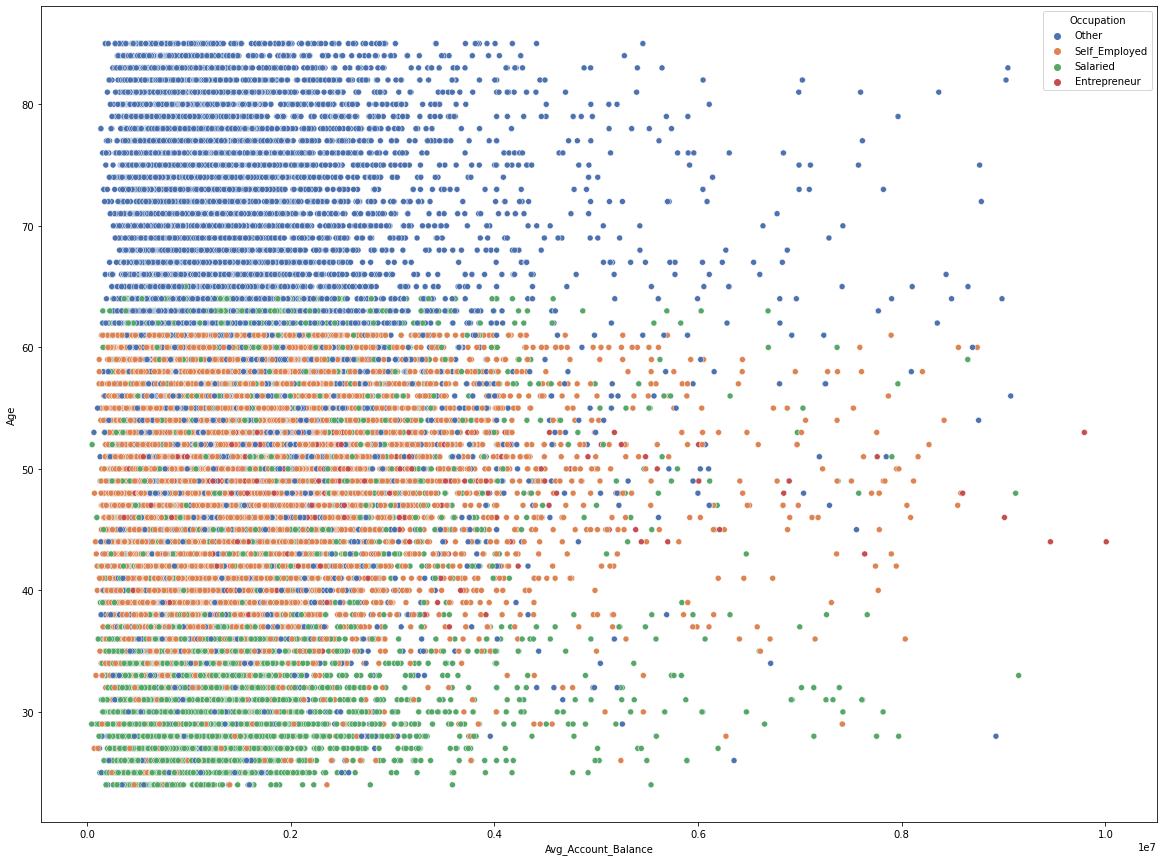

In [52]:
#Leads only by Average account balance, age, and occupation

plt.figure(figsize=(20,15))
sns.scatterplot(data=dfIsLead, x="Avg_Account_Balance", y="Age", hue="Occupation", palette = "deep")

plt.show();


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

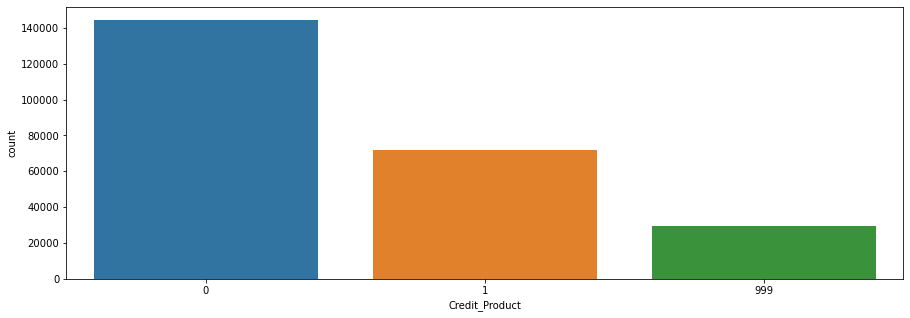

In [53]:
# Checking the Credit Product column
plt.figure(figsize=(15, 5))
sns.countplot(dfmod['Credit_Product'])
# sns.countplot(dfmod['Avg_Account_Balance'])

<Figure size 1080x360 with 0 Axes>

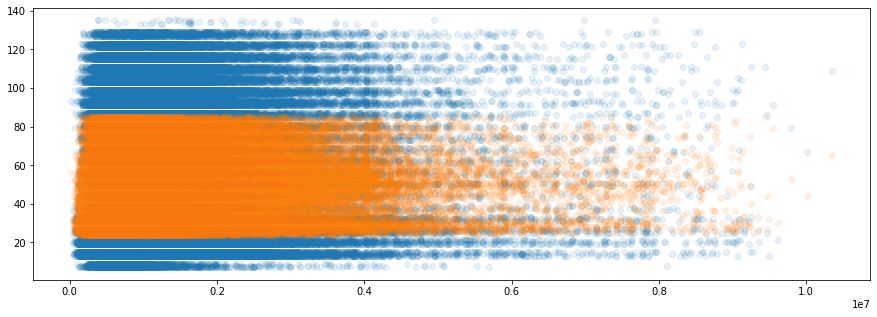

In [54]:
#Visualizing vintage and age due to their high correlation
plt.figure(figsize=(15, 5))
plt.scatter(dfmod['Avg_Account_Balance'], dfmod['Vintage'], alpha=0.1)
plt.scatter(dfmod['Avg_Account_Balance'], dfmod['Age'], alpha=0.1)

[Back to Top](#Top)

<a id = "CO"></a>

### Checking Outliers

#### Checking Outliers (tables)

In [55]:
#Binning. It looks like there are some clients with extremely large account balances. We'll divide the dataset into parts and try to drill down further on patterns.
#The "Stripped" part is for simplifying table results by only displaying what are essentially numerical columns

#highest accts
df_very_rich = dfmod[dfmod["Avg_Account_Balance"] >5000000]
stripped_df_very_rich = df_very_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#2nd highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_qr_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>999999)]
df_qr_step2 = df_qr_step1.loc[(df_qr_step1['Avg_Account_Balance']<5000000)]

df_quite_rich = df_qr_step2
stripped_df_quite_rich = df_quite_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#3rd highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_lr_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>500000)]
df_lr_step2 = df_lr_step1.loc[(df_lr_step1['Avg_Account_Balance']<1000000)]

df_less_rich = df_lr_step2

stripped_df_less_rich = df_less_rich[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#4th highest accts (must be done in two steps due to technical issue with fual condition filtering)

df_e_step1 = dfmod.loc[(dfmod['Avg_Account_Balance']>100000)]
df_e_step2 = df_e_step1.loc[(df_e_step1['Avg_Account_Balance']<500000)]

df_established = df_lr_step2

stripped_df_established = df_established[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#5th highest accts and lower

df_average  = dfmod[dfmod["Avg_Account_Balance"] <100000]

stripped_df_average = df_average[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#No one over 1 million
df_no_millionaires = dfmod[dfmod["Avg_Account_Balance"] <1000000]

stripped_df_no_millionaires = df_no_millionaires[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

#No one under 1 million
df_not_under_1mil = dfmod[dfmod["Avg_Account_Balance"] >1000000]

stripped_df_not_under_1mil = df_not_under_1mil[["Avg_Account_Balance","Age","Vintage","Is_Lead"]]

In [56]:
print("Very Rich (Over 5 mil)")
stripped_df_very_rich.describe()
stripped_df_very_rich.groupby("Is_Lead").mean()
stripped_df_very_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print('Quite Rich (1 mil to 5 mil)')
stripped_df_quite_rich.describe()
stripped_df_quite_rich.groupby("Is_Lead").mean()
stripped_df_quite_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Less Rich (500K to 1 mil)")
stripped_df_less_rich.describe()
stripped_df_less_rich.groupby("Is_Lead").mean()
stripped_df_less_rich.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Established (100K to 500K)")
stripped_df_established.describe()
stripped_df_established.groupby("Is_Lead").mean()
stripped_df_established.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Average (Under 100K)")
stripped_df_average.describe()
stripped_df_average.groupby("Is_Lead").mean()
stripped_df_average.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("No Millionaires")
stripped_df_no_millionaires.describe()
stripped_df_no_millionaires.groupby("Is_Lead").mean()
stripped_df_no_millionaires.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')
print("Only Above 1 Million")
stripped_df_not_under_1mil.describe()
stripped_df_not_under_1mil.groupby("Is_Lead").mean()
stripped_df_not_under_1mil.groupby("Is_Lead").describe().T
print('-----------------------------------------------------')

Very Rich (Over 5 mil)


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,1.762000e+03,1762.00000,1762.000000,1762.000000
mean,6.415981e+06,47.34790,55.853575,0.243473
std,1.103387e+06,16.11729,35.975228,0.429300
min,5.001978e+06,24.00000,7.000000,0.000000
25%,5.483443e+06,31.00000,25.000000,0.000000
50%,6.140648e+06,47.00000,49.000000,0.000000
75%,7.171432e+06,59.00000,90.000000,0.000000
max,1.035201e+07,85.00000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,6.443903e+06,45.791448,50.409602
1,6.329221e+06,52.184149,72.769231


Is_Lead                               0             1
Avg_Account_Balance count  1.333000e+03  4.290000e+02
                    mean   6.443903e+06  6.329221e+06
                    std    1.103066e+06  1.101155e+06
                    min    5.001978e+06  5.002681e+06
                    25%    5.511031e+06  5.416246e+06
                    50%    6.187911e+06  6.021962e+06
                    75%    7.199432e+06  7.092045e+06
                    max    1.035201e+07  1.000768e+07
Age                 count  1.333000e+03  4.290000e+02
                    mean   4.579145e+01  5.218415e+01
                    std    1.646696e+01  1.392574e+01
                    min    2.400000e+01  2.400000e+01
                    25%    3.000000e+01  4.400000e+01
                    50%    4.500000e+01  5.100000e+01
                    75%    5.700000e+01  6.100000e+01
                    max    8.500000e+01  8.500000e+01
Vintage             count  1.333000e+03  4.290000e+02
                    mean   5.040960e+01  7.276923e+01
                    std    3.467748e+01  3.469123e+01
                    min    7.000000e+00  8.000000e+00
                    25%    2.100000e+01  3.800000e+01
                    50%    3.300000e+01  8.100000e+01
                    75%    7.500000e+01  9.800000e+01
                    max    1.350000e+02  1.290000e+02

-----------------------------------------------------
Quite Rich (1 mil to 5 mil)


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,1.033470e+05,103347.000000,103347.000000,103347.000000
mean,1.703011e+06,46.529227,53.675898,0.270864
std,7.223981e+05,15.237569,34.099176,0.444408
min,1.000004e+06,23.000000,7.000000,0.000000
25%,1.188888e+06,31.000000,25.000000,0.000000
50%,1.464156e+06,47.000000,44.000000,0.000000
75%,1.955890e+06,57.000000,85.000000,1.000000
max,4.999993e+06,85.000000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,1.697155e+06,44.561496,47.544298
1,1.718774e+06,51.826135,70.181474


Is_Lead                               0             1
Avg_Account_Balance count  7.535400e+04  2.799300e+04
                    mean   1.697155e+06  1.718774e+06
                    std    7.234370e+05  7.193701e+05
                    min    1.000004e+06  1.000039e+06
                    25%    1.184636e+06  1.200850e+06
                    50%    1.454633e+06  1.491640e+06
                    75%    1.947288e+06  1.976271e+06
                    max    4.999993e+06  4.994733e+06
Age                 count  7.535400e+04  2.799300e+04
                    mean   4.456150e+01  5.182614e+01
                    std    1.564327e+01  1.264849e+01
                    min    2.300000e+01  2.400000e+01
                    25%    3.000000e+01  4.500000e+01
                    50%    4.400000e+01  5.100000e+01
                    75%    5.500000e+01  5.900000e+01
                    max    8.500000e+01  8.500000e+01
Vintage             count  7.535400e+04  2.799300e+04
                    mean   4.754430e+01  7.018147e+01
                    std    3.226705e+01  3.341348e+01
                    min    7.000000e+00  7.000000e+00
                    25%    2.100000e+01  3.300000e+01
                    50%    3.300000e+01  7.900000e+01
                    75%    6.900000e+01  9.700000e+01
                    max    1.350000e+02  1.350000e+02

-----------------------------------------------------
Less Rich (500K to 1 mil)


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,102557.000000,102557.000000,102557.000000,102557.000000
mean,734888.404994,42.498221,43.407500,0.222900
std,140943.307797,14.320278,30.598792,0.416194
min,500002.000000,24.000000,7.000000,0.000000
25%,614082.000000,29.000000,20.000000,0.000000
50%,727672.000000,41.000000,31.000000,0.000000
75%,851934.000000,52.000000,67.000000,0.000000
max,999995.000000,85.000000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,732685.011230,40.713703,39.181224
1,742570.114217,48.719598,58.141601


Is_Lead                                0              1
Avg_Account_Balance count   79697.000000   22860.000000
                    mean   732685.011230  742570.114217
                    std    141020.105002  140408.163414
                    min    500002.000000  500002.000000
                    25%    611483.000000  623041.750000
                    50%    724041.000000  737996.000000
                    75%    849220.000000  860727.000000
                    max    999995.000000  999995.000000
Age                 count   79697.000000   22860.000000
                    mean       40.713703      48.719598
                    std        14.247986      12.746363
                    min        24.000000      24.000000
                    25%        29.000000      41.000000
                    50%        36.000000      48.000000
                    75%        50.000000      56.000000
                    max        85.000000      85.000000
Vintage             count   79697.000000   22860.000000
                    mean       39.181224      58.141601
                    std        28.256307      33.728521
                    min         7.000000       7.000000
                    25%        20.000000      25.000000
                    50%        27.000000      61.000000
                    75%        55.000000      91.000000
                    max       135.000000     133.000000

-----------------------------------------------------
Established (100K to 500K)


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,102557.000000,102557.000000,102557.000000,102557.000000
mean,734888.404994,42.498221,43.407500,0.222900
std,140943.307797,14.320278,30.598792,0.416194
min,500002.000000,24.000000,7.000000,0.000000
25%,614082.000000,29.000000,20.000000,0.000000
50%,727672.000000,41.000000,31.000000,0.000000
75%,851934.000000,52.000000,67.000000,0.000000
max,999995.000000,85.000000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,732685.011230,40.713703,39.181224
1,742570.114217,48.719598,58.141601


Is_Lead                                0              1
Avg_Account_Balance count   79697.000000   22860.000000
                    mean   732685.011230  742570.114217
                    std    141020.105002  140408.163414
                    min    500002.000000  500002.000000
                    25%    611483.000000  623041.750000
                    50%    724041.000000  737996.000000
                    75%    849220.000000  860727.000000
                    max    999995.000000  999995.000000
Age                 count   79697.000000   22860.000000
                    mean       40.713703      48.719598
                    std        14.247986      12.746363
                    min        24.000000      24.000000
                    25%        29.000000      41.000000
                    50%        36.000000      48.000000
                    75%        50.000000      56.000000
                    max        85.000000      85.000000
Vintage             count   79697.000000   22860.000000
                    mean       39.181224      58.141601
                    std        28.256307      33.728521
                    min         7.000000       7.000000
                    25%        20.000000      25.000000
                    50%        27.000000      61.000000
                    75%        55.000000      91.000000
                    max       135.000000     133.000000

-----------------------------------------------------
Average (Under 100K)


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,78.000000,78.000000,78.000000,78.000000
mean,80007.294872,35.820513,31.012821,0.153846
std,17236.090997,10.177316,22.158516,0.363137
min,20790.000000,24.000000,9.000000,0.000000
25%,69893.500000,28.000000,19.000000,0.000000
50%,86636.500000,31.000000,26.000000,0.000000
75%,93038.000000,42.750000,32.000000,0.000000
max,99484.000000,65.000000,103.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,80071.590909,34.878788,28.348485
1,79653.666667,41.000000,45.666667


Is_Lead                               0             1
Avg_Account_Balance count     66.000000     12.000000
                    mean   80071.590909  79653.666667
                    std    17236.313880  17996.770166
                    min    20790.000000  45950.000000
                    25%    69893.500000  70387.250000
                    50%    86636.500000  85479.500000
                    75%    93000.500000  93565.250000
                    max    99484.000000  99332.000000
Age                 count     66.000000     12.000000
                    mean      34.878788     41.000000
                    std       10.129189      9.175065
                    min       24.000000     27.000000
                    25%       27.250000     32.000000
                    50%       31.000000     43.500000
                    75%       40.000000     46.500000
                    max       65.000000     53.000000
Vintage             count     66.000000     12.000000
                    mean      28.348485     45.666667
                    std       19.016990     31.986740
                    min        9.000000     15.000000
                    25%       19.000000     20.750000
                    50%       25.500000     26.500000
                    75%       31.750000     81.000000
                    max      103.000000     93.000000

-----------------------------------------------------
No Millionaires


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,140616.000000,140616.000000,140616.000000,140616.000000
mean,639833.440704,41.848068,41.911148,0.212394
std,202003.888547,14.174656,29.978882,0.409004
min,20790.000000,24.000000,7.000000,0.000000
25%,485975.000000,29.000000,20.000000,0.000000
50%,642286.000000,39.000000,27.000000,0.000000
75%,804375.250000,51.000000,62.000000,0.000000
max,999995.000000,85.000000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,634485.209093,40.122953,37.980777
1,659665.914116,48.245195,56.485870


Is_Lead                                0              1
Avg_Account_Balance count  110750.000000   29866.000000
                    mean   634485.209093  659665.914116
                    std    202774.115702  197867.071593
                    min     20790.000000   45950.000000
                    25%    479549.000000  510975.000000
                    50%    635468.500000  667215.000000
                    75%    799163.750000  820624.000000
                    max    999995.000000  999995.000000
Age                 count  110750.000000   29866.000000
                    mean       40.122953      48.245195
                    std        14.021395      12.844915
                    min        24.000000      24.000000
                    25%        29.000000      40.000000
                    50%        35.000000      48.000000
                    75%        49.000000      55.000000
                    max        85.000000      85.000000
Vintage             count  110750.000000   29866.000000
                    mean       37.980777      56.485870
                    std        27.594429      33.736172
                    min         7.000000       7.000000
                    25%        19.000000      25.000000
                    50%        27.000000      57.000000
                    75%        50.000000      87.000000
                    max       135.000000     135.000000

-----------------------------------------------------
Only Above 1 Million


,Avg_Account_Balance,Age,Vintage,Is_Lead
count,1.051090e+05,105109.000000,105109.000000,105109.000000
mean,1.782017e+06,46.542951,53.712403,0.270405
std,9.484848e+05,15.253016,34.132440,0.444171
min,1.000004e+06,23.000000,7.000000,0.000000
25%,1.192626e+06,31.000000,25.000000,0.000000
50%,1.476447e+06,47.000000,44.000000,0.000000
75%,1.992638e+06,57.000000,85.000000,1.000000
max,1.035201e+07,85.000000,135.000000,1.000000


,Avg_Account_Balance,Age,Vintage
Is_Lead,,,
0,1.779665e+06,44.582876,47.594103
1,1.788364e+06,51.831539,70.220533


Is_Lead                               0             1
Avg_Account_Balance count  7.668700e+04  2.842200e+04
                    mean   1.779665e+06  1.788364e+06
                    std    9.592955e+05  9.186679e+05
                    min    1.000004e+06  1.000039e+06
                    25%    1.188443e+06  1.204120e+06
                    50%    1.466453e+06  1.502604e+06
                    75%    1.986373e+06  2.012975e+06
                    max    1.035201e+07  1.000768e+07
Age                 count  7.668700e+04  2.842200e+04
                    mean   4.458288e+01  5.183154e+01
                    std    1.565867e+01  1.266853e+01
                    min    2.300000e+01  2.400000e+01
                    25%    3.000000e+01  4.500000e+01
                    50%    4.400000e+01  5.100000e+01
                    75%    5.500000e+01  5.900000e+01
                    max    8.500000e+01  8.500000e+01
Vintage             count  7.668700e+04  2.842200e+04
                    mean   4.759410e+01  7.022053e+01
                    std    3.231241e+01  3.343398e+01
                    min    7.000000e+00  7.000000e+00
                    25%    2.100000e+01  3.300000e+01
                    50%    3.300000e+01  7.900000e+01
                    75%    6.900000e+01  9.700000e+01
                    max    1.350000e+02  1.350000e+02

-----------------------------------------------------


[Back to Top](#Top)

#### Checking Outliers (graphs)

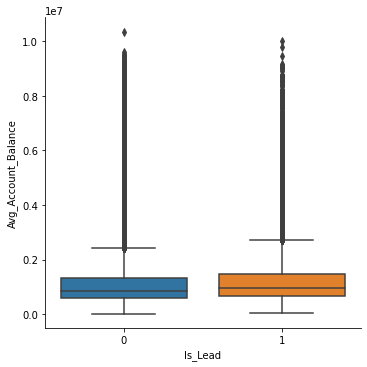

In [57]:
#original dataset
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = dfmod,  kind="box")

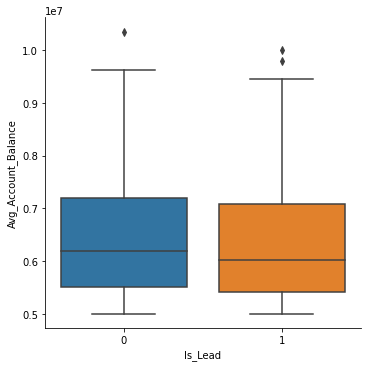

In [58]:
#Very Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_very_rich,  kind="box")

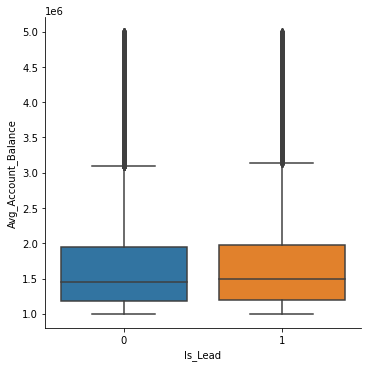

In [59]:
#Quite Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_quite_rich,  kind="box")

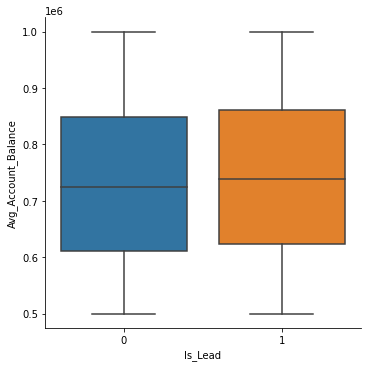

In [60]:
#Less Rich
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_less_rich,  kind="box")

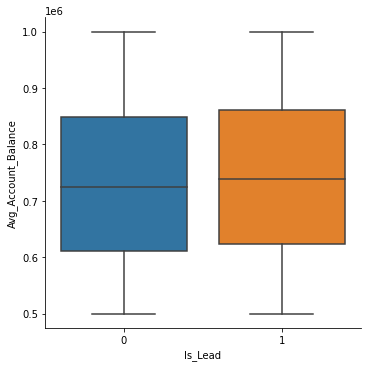

In [61]:
#Established
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_established,  kind="box")

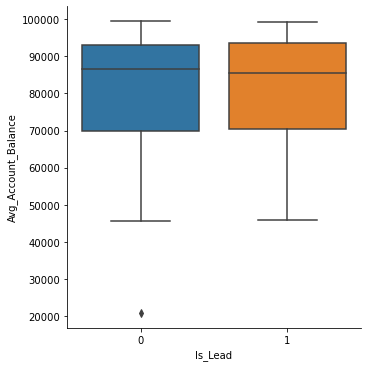

In [62]:
#Average
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_average,  kind="box")

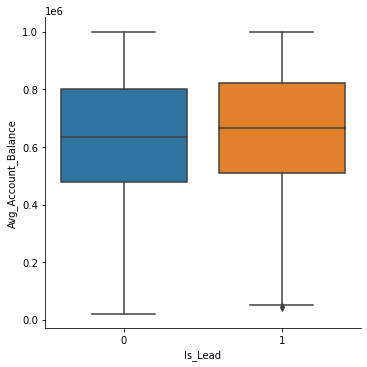

In [63]:
#no_millionaires
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_no_millionaires,  kind="box")

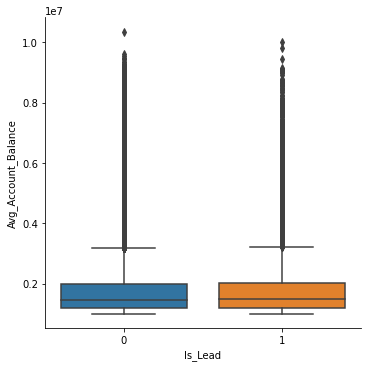

In [64]:
#No one under 1 million
sns.factorplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = df_not_under_1mil,  kind="box")

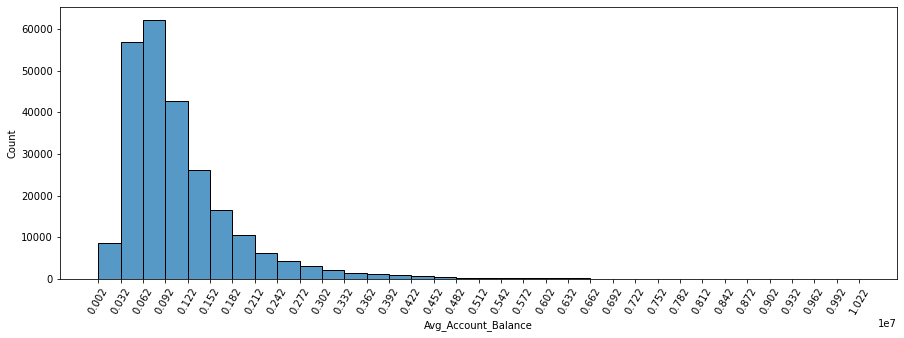

In [65]:
# Average Account Balance

plt.figure(figsize=(15, 5))
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),300000)
sns.histplot(dfmod['Avg_Account_Balance'],bins=bins)

plt.xticks(bins)
plt.xticks(rotation=60)
plt.show();

<a id = "O"></a>

## Removing Outliers

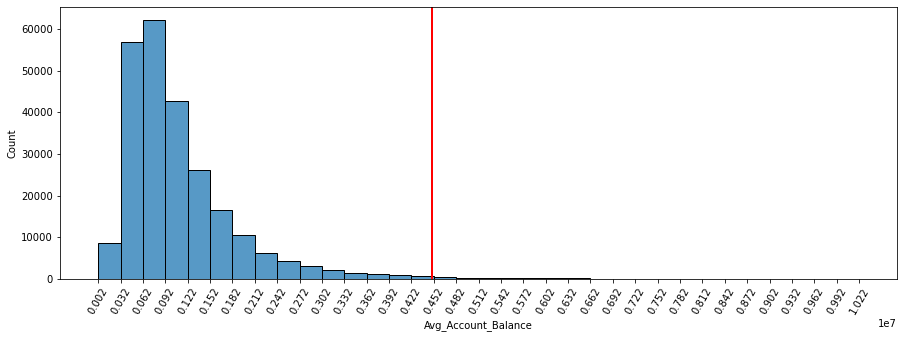

In [66]:
#Let's try remove anyone over 4.5 million in their Average Account Balance

plt.figure(figsize=(15, 5))
bins = np.arange(dfmod.Avg_Account_Balance.min(),dfmod.Avg_Account_Balance.max(),300000)
sns.histplot(dfmod['Avg_Account_Balance'],bins=bins)
plt.axvline(x=4500000,  linewidth=2, color='red')

plt.xticks(bins)
plt.xticks(rotation=60)
plt.show();

In [67]:
#Create copy of dataset from which datapoints will be removed for comparison later
dfmod2 = dfmod.copy()

In [68]:
#Drop datapoints 
dfmod2.drop(dfmod2.Avg_Account_Balance[dfmod2.Avg_Account_Balance > 4500000].index,inplace=True, axis=0)

[Back to Top](#Top)

<a id = "FE"></a>

## Feature Engineering

In [69]:
#in progress - this will be complete in stage 2 of the project
#plan: create new categories (eg. age category (youth, adult, senior) out of the age column)

<a id = "ML"></a>

## Part 2: Machine Learning

### Preparing the model

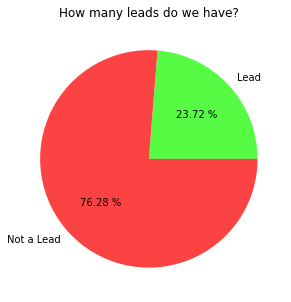

In [70]:
# Once again, let's visualize the proportions of the target variable
plt.figure(figsize=(8,5))

labels = ['Lead', 'Not a Lead']
colors = ['#56FC43', '#FC4343']

plt.pie([Lead, NotLead], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('How many leads do we have?')

plt.show();

In [71]:
# We'll create a list of all the Categorical features and a list of all the numerical features for encoding purposes
categorical = list(dfmod.select_dtypes(["object"]).columns)
numerical = list(dfmod.select_dtypes(["float64","int64"]).columns)
print(f"There are {len(numerical)} numerical columns.")
print(f"There are {len(categorical)} categorical columns.")

There are 7 numerical columns.
There are 3 categorical columns.


In [72]:
# Now we'll One Hot Encode the categorical features and drop extra dummy variables since the ML model can only accept number values
dfML = pd.get_dummies(dfmod, columns=categorical, drop_first=True)
print(f"The dataset shape prior to OneHotEncoding is: {dfmod.shape}")
print(f"The dataset shape after OneHotEncoding is: {dfML.shape}")
print(f"({dfML.shape} - {dfmod.shape}) columns were added.")

The dataset shape prior to OneHotEncoding is: (245725, 10)
The dataset shape after OneHotEncoding is: (245725, 47)
((245725, 47) - (245725, 10)) columns were added.


In [73]:
dfML.head(5)

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,0,1045696,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,30,32,0,581988,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,56,26,0,1484315,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,34,19,0,470454,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,30,33,0,886787,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [75]:
# Defining our variables for the model
# lis
nums = range(1,47,1)
X = dfML.iloc[:,[1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]
    # next try: for dependent variables, send two lists with a plus. 1 -6 , 7 -47
    # independent variables
    
y = df.loc[:,"Is_Lead"] # Dependent variable/taget
X.head()
y.value_counts()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,73,43,0,1045696,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,30,32,0,581988,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,56,26,0,1484315,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,34,19,0,470454,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,33,0,886787,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


0    187437
1     58288
Name: Is_Lead, dtype: int64

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [77]:
# Splitting the dataset into Test/Train and defining model variables , stratify=y
# We will split 80% for train and 20% for test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 1,shuffle=True, stratify=y)

In [78]:
# Oversampling to deal with the imbalance in the target data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#oversamples the minority class and balances for a 50 50 split
#oversample only train data, not test (for real world application)

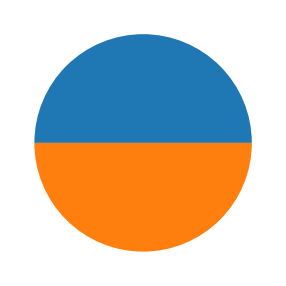

In [79]:
#The resulting data is now a more even 50/50 split.

#plt.pie(dfmod.Is_Lead.value_counts())
plt.pie(y_train.value_counts())
plt.show();

### Training the model

In [80]:
# Import the necessary libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer,accuracy_score


In [98]:
# Create a list of the classifiers to be tested with the dataset
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier:', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(predictions,y_test)
    recall = recall_score(predictions,y_test)
    precision = precision_score(predictions,y_test)
    f1 = f1_score(predictions,y_test)
    cv_score = cross_val_score(classifier, X_test, y_test, cv=8)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df.to_csv('Classifier_Scores.csv', index=False)
metrics_df

DecisionTreeClassifier()

RandomForestClassifier()

GaussianNB()

KNeighborsClassifier()

SVC()

LogisticRegression()

ExtraTreesClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

[17:45:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[17:45:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:40] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:42] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Classifier,Accuracy,CV Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.785349,0.785492,0.545492,0.570338,0.557638
0,RandomForest,0.837318,0.851826,0.660841,0.645479,0.653070
0,Naive Bayes,0.586143,0.627551,0.343388,0.816349,0.483428
0,KNeighbours,0.740035,0.835568,0.466706,0.672156,0.550900
0,SVM,0.798291,0.856649,0.565078,0.649854,0.604508
0,LogisticRegression,0.775766,0.850605,0.520755,0.686567,0.592275
0,ExtraTreesClassifier,0.824580,0.836056,0.632055,0.623435,0.627715
0,AdaBoostClassifier,0.831743,0.856079,0.631143,0.699520,0.663575
0,GradientBoostingClassifier,0.834632,0.860983,0.632158,0.724395,0.675141
0,XGB,0.857910,0.856832,0.745149,0.609453,0.670504


### Hyperparameter Tuning

In [111]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBClassifier()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#Type of booster
booster = ['gbtree','dart']
# Number of parellel trees
num_parallel_tree = [5]
# Maximum number of levels in the tree structure
max_depth=list(range(2,8,2))
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "booster": booster,
              "max_depth":max_depth,
            'num_parallel_tree': num_parallel_tree}

XGB_rs = RandomizedSearchCV(
    estimator = XGB, param_distributions = param_grid,n_iter=5,n_jobs=8,scoring='accuracy')

In [112]:
XGB_rs.fit(X_test,y_test)

[18:35:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [113]:
y_pred = XGB_rs.predict(X_test)

In [114]:
# Evaluating the model after hyper-parameter tuning
print(f"The Recall score is: {recall_score(y_pred, y_test)}")
print(F"The Precision Score is: {precision_score(y_pred, y_test)}")
print(F"The F1 Score is: {f1_score(y_pred,y_test)}")
print(F"The Accuracy Score is: {accuracy_score(y_test, y_pred)}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

The Recall score is: 0.8249664429530201
The Precision Score is: 0.5271916280665637
The F1 Score is: 0.6432907682646013
The Accuracy Score is: 0.861308373181402
[[36183  5512]
 [ 1304  6146]]


In [115]:
from xgboost import XGBClassifier
XGBN = XGBClassifier()
XGBN.fit(X_train,y_train)

[18:35:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_pred = XGBN.predict(X_test)

In [117]:
# Evaluating the model with no hyper-parameter tuning
print(f"The Recall score is: {recall_score(y_pred, y_test)}")
print(F"The Precision Score is: {precision_score(y_pred, y_test)}")
print(F"The F1 Score is: {f1_score(y_pred,y_test)}")
print(F"The Accuracy Score is: {accuracy_score(y_test, y_pred)}")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

The Recall score is: 0.7497873245427478
The Precision Score is: 0.604820723966375
The F1 Score is: 0.6695470515620549
The Accuracy Score is: 0.8583782683894597
[[35134  4607]
 [ 2353  7051]]


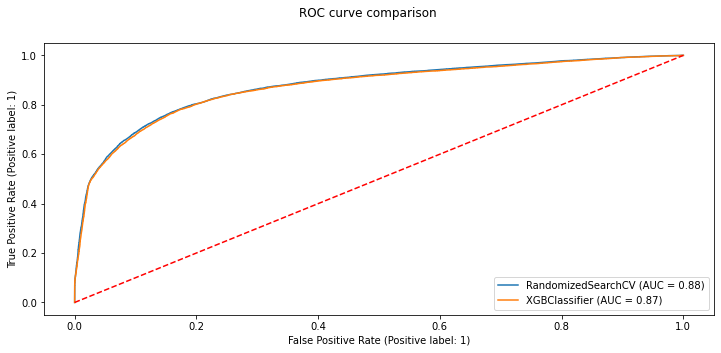

In [118]:
#ROC curve
# ROC_AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds
# ROC_AUC plot
from sklearn.metrics import plot_roc_curve
XGBC = plot_roc_curve(XGB_rs, X_test, y_test) 
XGBN = plot_roc_curve(XGBN, X_test, y_test, ax=XGBC.ax_)
#xgbc = plot_roc_curve(xgb, X_test, y_test)#, ax=dt.ax_)
# lgbc = plot_roc_curve(lgb, X_test, y_test, ax=xgbc.ax_)
# gbc = plot_roc_curve(gb, X_test, y_test, ax=lgbc.ax_)
plt.plot([0, 1], [0, 1],'r--')
XGBC.figure_.suptitle("ROC curve comparison")
plt.show();

#### Next steps:
+ Check the model perforance with the dataframe from which outliers were removed
+ Build a deep learning neural network to check accuracy increases


## Relevant Research 

+ https://www150.statcan.gc.ca/n1/daily-quotidien/190327/dq190327b-eng.htm
+ https://www.statcan.gc.ca/eng/concepts/definitions/age2